<a href="https://colab.research.google.com/github/jayyanar/12-week-ai-ml-ds-courses/blob/main/NLP_Info_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo 1 - Stop Word Removal

In [17]:
# Importing necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Sample review text
review = "The travel backpack is spacious, fits all my essentials, and is comfortable for long trips."

# Tokenizing the text
tokens = word_tokenize(review)

# Getting the English stop words
stop_words = set(stopwords.words('english'))

# Removing stop words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Displaying results
print("Original Tokens:", tokens)
print("Filtered Tokens:", filtered_tokens)

# Joining tokens to form the filtered sentence
filtered_sentence = ' '.join(filtered_tokens)
print("Filtered Sentence:", filtered_sentence)


Original Tokens: ['The', 'travel', 'backpack', 'is', 'spacious', ',', 'fits', 'all', 'my', 'essentials', ',', 'and', 'is', 'comfortable', 'for', 'long', 'trips', '.']
Filtered Tokens: ['travel', 'backpack', 'spacious', ',', 'fits', 'essentials', ',', 'comfortable', 'long', 'trips', '.']
Filtered Sentence: travel backpack spacious , fits essentials , comfortable long trips .


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Demo 2:  Stemming

### Porter Stemmer: Widely used for English and known for its simplicity.
### Snowball Stemmer: An improvement over the Porter Stemmer with more refined rules.
### Lancaster Stemmer: More aggressive than the Porter Stemmer, potentially leading to more over-stemming.

In [18]:
# Importing necessary libraries
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Sample reviews
reviews = [
    "The travel backpack is spacious, fits all my essentials, and is comfortable for long trips.",
    "The luggage is of good quality, but I find it a bit pricey for what it offers.",
    "I love the sleek design of the water bottle, but it tends to leak occasionally.",
    "The travel pillow is soft and supportive, making long flights more comfortable.",
    "I was impressed by the fast shipping and excellent customer service when buying the suitcase."
]

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Function to perform tokenization, stop words removal, and stemming
def process_and_stem_review(review):
    # Tokenize the review
    tokens = word_tokenize(review)

    # Remove stop words and non-alphabetic tokens
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # Apply stemming to each token
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join the stemmed tokens into a single string
    return ' '.join(stemmed_tokens)

# Process and stem each review
processed_reviews = [process_and_stem_review(review) for review in reviews]

# Display original and processed reviews
for i, (original, processed) in enumerate(zip(reviews, processed_reviews)):
    print(f"Review {i+1}:")
    print("Original:", original)
    print("Processed (Stemmed):", processed)
    print("-" * 50)

Review 1:
Original: The travel backpack is spacious, fits all my essentials, and is comfortable for long trips.
Processed (Stemmed): travel backpack spaciou fit essenti comfort long trip
--------------------------------------------------
Review 2:
Original: The luggage is of good quality, but I find it a bit pricey for what it offers.
Processed (Stemmed): luggag good qualiti find bit pricey offer
--------------------------------------------------
Review 3:
Original: I love the sleek design of the water bottle, but it tends to leak occasionally.
Processed (Stemmed): love sleek design water bottl tend leak occasion
--------------------------------------------------
Review 4:
Original: The travel pillow is soft and supportive, making long flights more comfortable.
Processed (Stemmed): travel pillow soft support make long flight comfort
--------------------------------------------------
Review 5:
Original: I was impressed by the fast shipping and excellent customer service when buying the 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
pip install wordcloud matplotlib

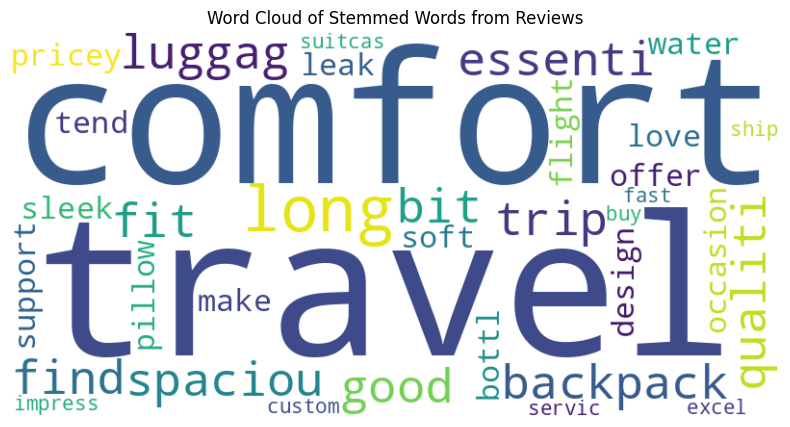

In [20]:
# Importing necessary libraries for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Install wordcloud if not already installed
# !pip install wordcloud

# Combine all processed reviews into one large string for visualization
all_processed_text = ' '.join(processed_reviews)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_processed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner look
plt.title('Word Cloud of Stemmed Words from Reviews')
plt.show()

# Demo 3: BagOfWords

<ipython-input-21-0336aafeb44e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow_word_counts.values, y=bow_word_counts.index, palette="Blues_d")


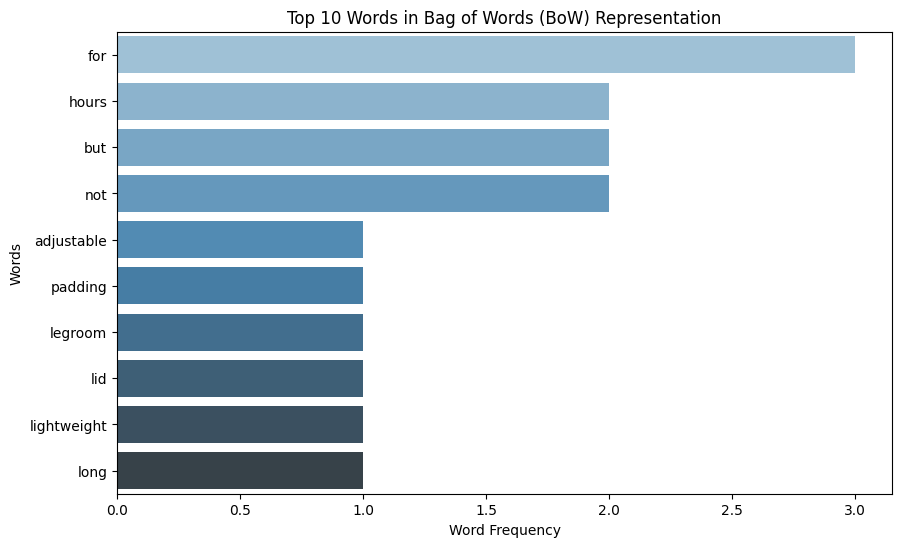

<ipython-input-21-0336aafeb44e>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_word_scores.values, y=tfidf_word_scores.index, palette="Greens_d")


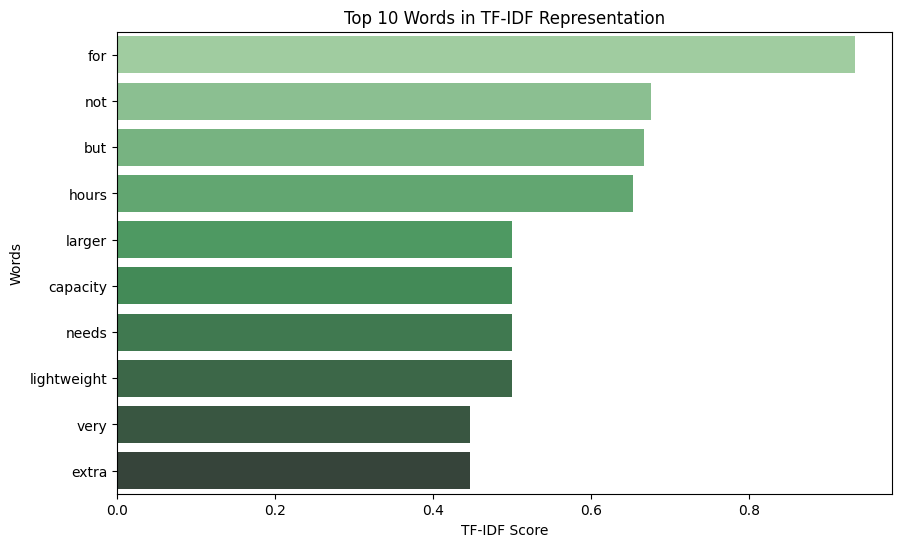

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample reviews dataset
reviews = [
    "Spacious suitcase; easy packing for trips.",
    "Durable but a bit heavy when full.",
    "Smooth wheels; navigates airports easily.",
    "Keeps drinks cold for hours; great for hikes.",
    "Convenient lid but can leak if not closed.",
    "Lightweight; needs a larger capacity.",
    "Comfortable seat; slept well on the flight.",
    "Adjustable headrest makes long journeys better.",
    "Extra legroom; very enjoyable trip.",
    "Not enough padding; uncomfortable after hours."
]

# Bag of Words (BoW) representation
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(reviews)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Plot BoW visualization for top 10 words
plt.figure(figsize=(10, 6))
bow_word_counts = bow_df.sum().sort_values(ascending=False).head(10)
sns.barplot(x=bow_word_counts.values, y=bow_word_counts.index, palette="Blues_d")
plt.title("Top 10 Words in Bag of Words (BoW) Representation")
plt.xlabel("Word Frequency")
plt.ylabel("Words")
plt.show()

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Plot TF-IDF visualization for top 10 words with highest TF-IDF score
plt.figure(figsize=(10, 6))
tfidf_word_scores = tfidf_df.sum().sort_values(ascending=False).head(10)
sns.barplot(x=tfidf_word_scores.values, y=tfidf_word_scores.index, palette="Greens_d")
plt.title("Top 10 Words in TF-IDF Representation")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()


# Demo 4: Tokenization

### Word Embedding

In [22]:
pip install matplotlib scikit-learn

In [23]:
pip install spacy

In [24]:
! python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


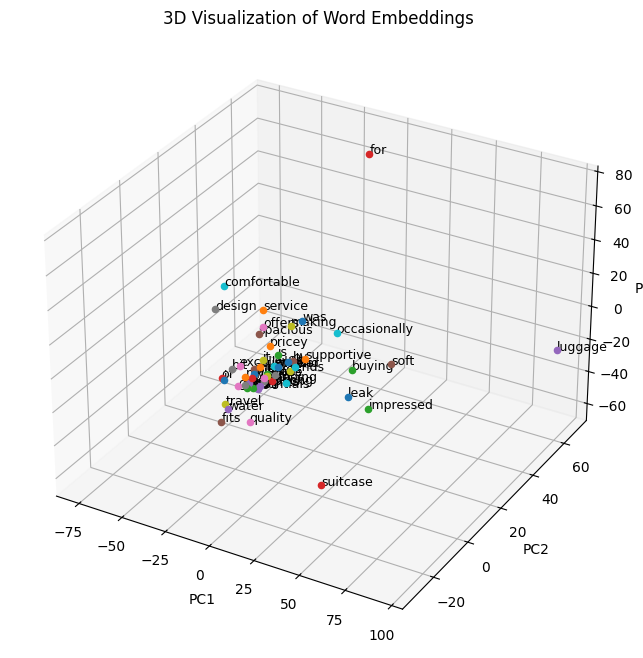

In [25]:
# Import necessary libraries
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load spaCy's pre-trained language model
nlp = spacy.load('en_core_web_md')

# Sample review dataset
reviews = [
    "The travel backpack is spacious, fits all my essentials, and is comfortable for long trips.",
    "The luggage is of good quality, but I find it a bit pricey for what it offers.",
    "I love the sleek design of the water bottle, but it tends to leak occasionally.",
    "The travel pillow is soft and supportive, making long flights more comfortable.",
    "I was impressed by the fast shipping and excellent customer service when buying the suitcase."
]

# Extract unique words and their embeddings
unique_words = set()
word_embeddings = []

for review in reviews:
    doc = nlp(review)
    for token in doc:
        if token.is_alpha and token.text.lower() not in unique_words:
            unique_words.add(token.text.lower())
            word_embeddings.append(token.vector)

# Convert to a numpy matrix for dimensionality reduction
embedding_matrix = np.array(word_embeddings)
words_list = list(unique_words)

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Plotting the 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each word in 3D space
for i, word in enumerate(words_list):
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], marker='o')
    ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], word, fontsize=9)

# Set plot labels and title
ax.set_title('3D Visualization of Word Embeddings')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


# Sentence Embedding

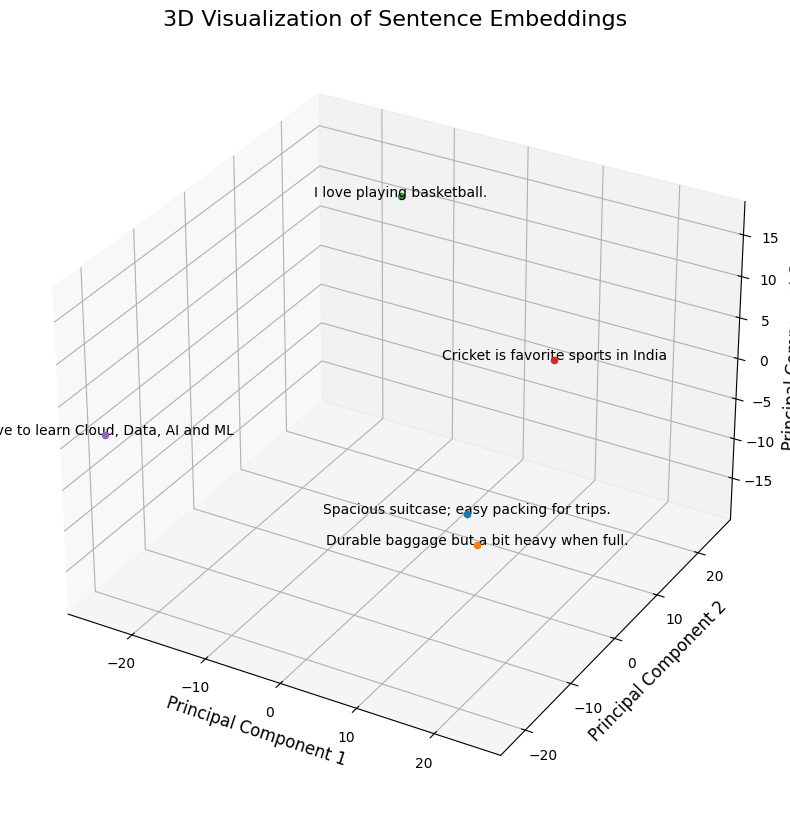

In [26]:
# Import necessary libraries
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load spaCy's pre-trained language model
nlp = spacy.load('en_core_web_md')

# Brief review dataset (10 reviews)
reviews = [
    "Spacious suitcase; easy packing for trips.",
    "Durable baggage but a bit heavy when full.",
    "I love playing basketball.",
    "Cricket is favorite sports in India",
    "I love to learn Cloud, Data, AI and ML"
]

# Calculate sentence embeddings by averaging word vectors
sentence_embeddings = []
for review in reviews:
    doc = nlp(review)
    embeddings = [token.vector for token in doc if token.is_alpha]  # Get word vectors for alpha tokens
    sentence_embedding = np.mean(embeddings, axis=0) if embeddings else np.zeros((nlp.vocab.vectors.shape[1],))
    sentence_embeddings.append(sentence_embedding)

# Convert to a numpy matrix for dimensionality reduction
embedding_matrix = np.array(sentence_embeddings)

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Plotting the 3D visualization
fig = plt.figure(figsize=(14, 10))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Plot each brief review in 3D space
for i, review in enumerate(reviews):
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], marker='o')
    ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], review, fontsize=10, ha='center')

# Set plot labels and title
ax.set_title('3D Visualization of Sentence Embeddings', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

plt.show()


KNN - Demo

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



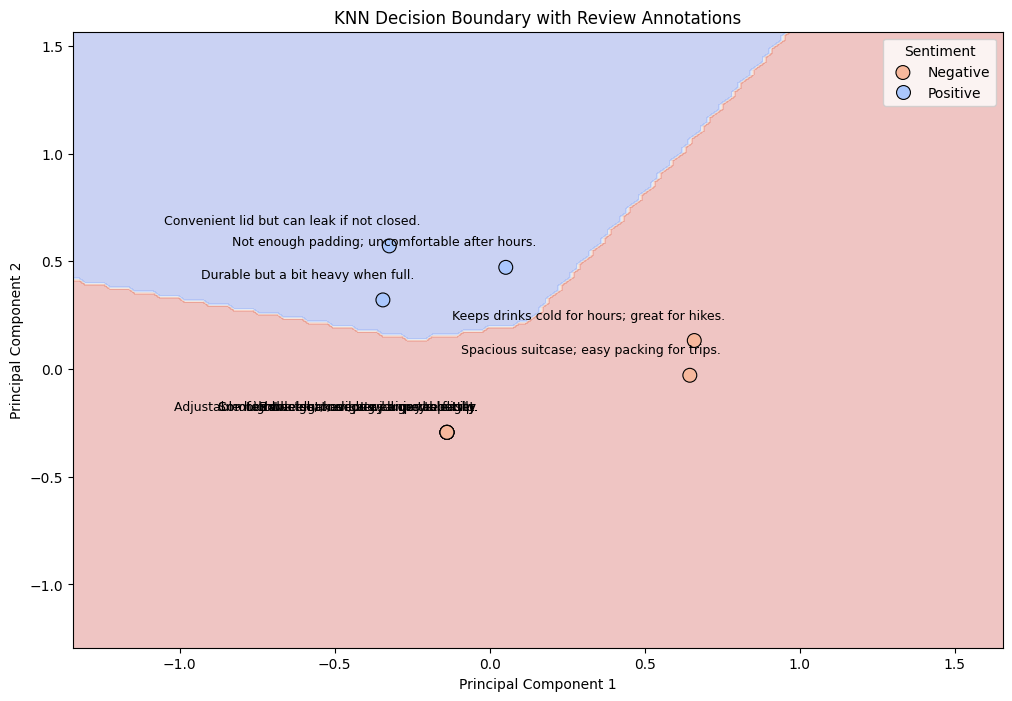

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Sample reviews dataset and labels (0 = Negative, 1 = Positive)
reviews = [
    "Spacious suitcase; easy packing for trips.",
    "Durable but a bit heavy when full.",
    "Smooth wheels; navigates airports easily.",
    "Keeps drinks cold for hours; great for hikes.",
    "Convenient lid but can leak if not closed.",
    "Lightweight; needs a larger capacity.",
    "Comfortable seat; slept well on the flight.",
    "Adjustable headrest makes long journeys better.",
    "Extra legroom; very enjoyable trip.",
    "Not enough padding; uncomfortable after hours."
]
labels = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0]  # Positive or Negative sentiment

# Step 1: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(reviews).toarray()

# Step 2: Reduce dimensionality for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.3, random_state=42)

# Step 4: Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Choosing 3 neighbors for KNN
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Display accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 5: Visualization of decision boundary with a hyperplane
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the KNN model to predict on the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="coolwarm", s=100, edgecolor='k')

# Annotate each point with the review text
for i, review in enumerate(reviews):
    plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, review, fontsize=9, ha='right')

plt.title("KNN Decision Boundary with Review Annotations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()
